In [9]:
%matplotlib inline

import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [10]:
output_file = 'output/time_series.output'

In [63]:
col_descs = {
    'time': 'simulation time',
    'An': 'Net carbon assimilation flux of whole plant ($\\mu mol s^{-1}$)',
    'E': 'Transpiration flux of whole plant ($g h^{-1}$)',
    'Rg': 'Absorbed shortwave irradiance by whole plant ($W m_{ground}^{-2}$)',
    'Tleaf': 'Median leaf temperature (degrees Celsius)'
}

data = pd.read_csv(output_file, sep=';')
data['time'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')
data.head()

,time,Rg,An,E,Tleaf
0,2012-08-01 00:00:00,0.0,-1.960767,4.164749e-11,16.620123
1,2012-08-01 01:00:00,0.0,-2.153141,5.554039e-11,17.877212
2,2012-08-01 02:00:00,0.0,-2.275122,5.372938e-11,18.561438
3,2012-08-01 03:00:00,0.0,-2.224711,5.707320e-11,18.195865
4,2012-08-01 04:00:00,0.0,-2.063881,4.088476e-11,17.112675


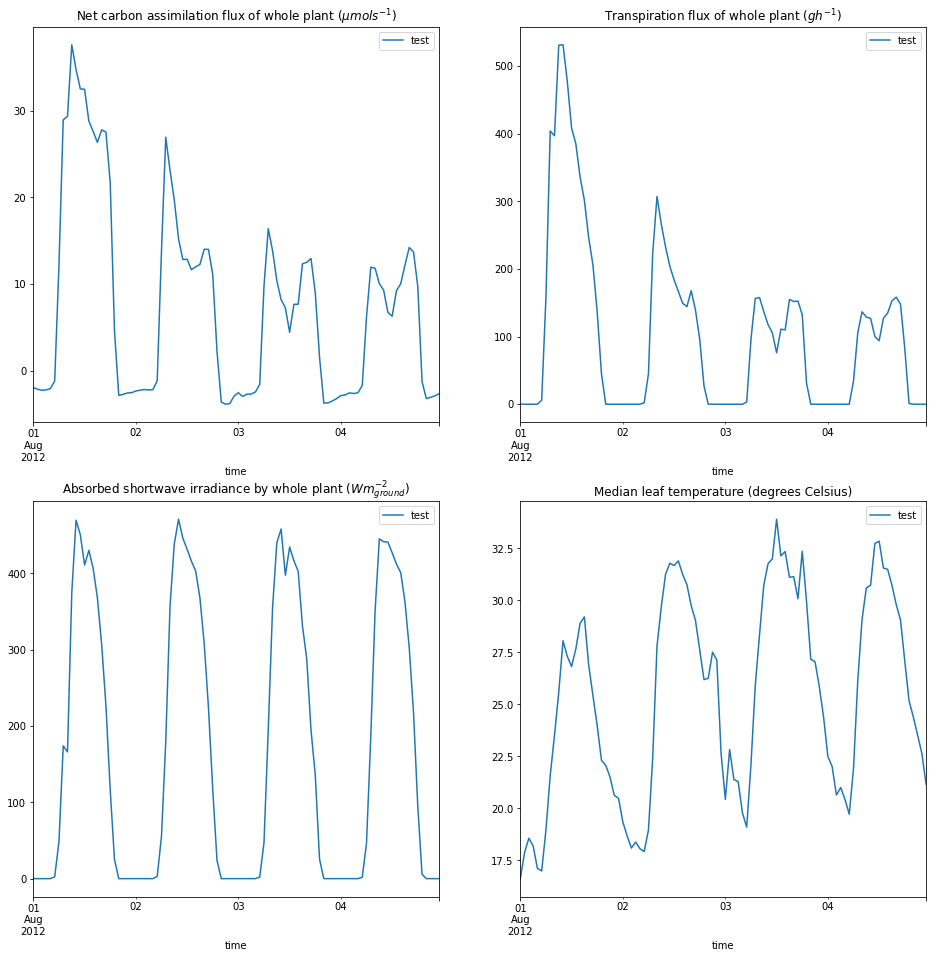

In [68]:
fig, ax = plt.subplots(2, 2, figsize=(16, 16))

for i, col in enumerate(['An', 'E', 'Rg', 'Tleaf']):
    data.plot(x='time', y=col, label='test', title=col_descs[col], ax=ax[i//2][i%2])

# for i, (name, col) in enumerate(data[['An', 'E', 'Rg', 'Tleaf']].iteritems()):
#     col.plot(x=data['time'], title=col_descs[name], ax=ax[i//2][i%2])

plt.show()

## Restoring local information

Luckily, the simulation code already stores the *Multiscale Tree Graph* (MTG) of the plant at every time step.

The goal now is to load this pickled MTG graph, and then read out any physiological data from a multitude of plant nodes (e.g. from all leaves, the transpiration rate). 

In [130]:
from pickle import load
from openalea.mtg.aml import *

file = 'output/mtg20120804170000.pckl'

In [131]:
mtg = None
with open(file, 'rb') as f:
    g, scene = load(f)
    
# Activate the MTG graph in openalea
Activate(g)
Active() == g

True

In [115]:
[Class(x)+str(Index(x)) for x in Descendants(2)]

['t2',
 'a28',
 's38',
 's51',
 's55',
 's58',
 's76',
 's78',
 's84',
 's107',
 's111',
 's125',
 's127',
 's133',
 's154',
 's165',
 's170',
 's197',
 's199',
 's201',
 's203',
 's211',
 's218',
 's225',
 's231',
 's234',
 'G241',
 's254',
 'G271',
 's296',
 's317',
 's319',
 's324',
 's329',
 's331',
 's333',
 's336',
 's342',
 's360',
 's383',
 's385',
 's387',
 'a390',
 's400',
 's409',
 's427',
 's432',
 's439',
 's449',
 'G465',
 'G480',
 's483']

In [163]:
Class(1)

'p'

In [173]:
print(f'{"property type":<16}  |  {"found on node types ":<16}')
print()
for name, nodes in g.properties().items():
#     example = list(nodes.values())[0]
    nodes = set(nodes.keys())
    classes = set([Class(x) for x in nodes])
    
    
    print(f'{name:<16}  |  {", ".join(classes):<16}')

property type     |  found on node types 

edge_type         |  G, p, i, P, c, a, S, s, L
label             |  G, p, i, P, c, a, S, o, s, L, t
TopPosition       |  i, P, c, o, L   
TopDiameter       |  i, P, c         
BotPosition       |  L, i, P, c      
Length            |  L, i, P, c      
BotDiameter       |  i, P, c         
InitDiam          |  G, s            
PhytoType         |  i               
vid_base          |                  
vid_collar        |                  
Flux              |  L, i, P, c      
opticals          |  L, o            
Ei                |  L, o            
Eabs              |  L, o            
Ei10              |  L, o            
Na                |  L               
psi_head          |  L, i, P, c      
Tlc               |  L               
u                 |  L               
par_photo         |  L               
An                |  L               
Ci                |  L               
gs                |  L               
gb                |  

In [175]:
# For just the 'L' type (presumed to be leaves)

print('Property types found on "L" nodes')
print()
for name, nodes in g.properties().items():
#     example = list(nodes.values())[0]
    nodes = set(nodes.keys())
    classes = set([Class(x) for x in nodes])
    if 'L' in classes:
        print(f'{name:<16}')

Property types found on "L" nodes

edge_type       
label           
TopPosition     
BotPosition     
Length          
Flux            
opticals        
Ei              
Eabs            
Ei10            
Na              
psi_head        
Tlc             
u               
par_photo       
An              
Ci              
gs              
gb              
E               
leaf_area       
FluxC           
